# Lab.4: Part of Speech
## Introduction to Human Language Technologies
### Victor Badenas Crespo

***

### Statement:
- Consider Treebank corpus.
    - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.
    - Evaluate the resulting 24 models using sentences from 3001.
- Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
    - Which model would you select? Justify the answer.

*** 

## Solution

Import necessary packages and declare environment valiables.

In [2]:
import nltk
import dill
import tqdm
import time
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.corpus import treebank
from nltk.tag import CRFTagger
from nltk.tag import HiddenMarkovModelTrainer
from nltk.tag import PerceptronTagger
from nltk.tag import TnT
nltk.download('treebank')

MODELS_PATH = Path("./models")

[nltk_data] Downloading package treebank to /Users/victor/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Main training functions definition:
- saveModel will save the model to the indicated path
- evaluateModel runs .evaluate method of the object and returns the accuracy rounded.
- train<model> functions train a model of <model> kind and returns it

In [3]:
def saveModel(model, path):
    with open(path, "wb") as f:
        dill.dump(model, f)

def evaluateModel(testData, model, print_=True):
    acc = round(model.evaluate(testData), 3)
    if print_:
        print('accuracy: ' + str(acc))
    return acc

def trainHMM(trainData, modelPath):
    trainer = HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(trainData)
    saveModel(HMM, modelPath)
    return HMM

def trainTnT(trainData, modelPath):
    tnT = TnT()
    tnT.train(trainData)
    saveModel(tnT, modelPath)
    return tnT

def trainPerceptron(trainData, modelPath):
    PER = PerceptronTagger(load=False)
    PER.train(trainData)
    saveModel(PER, modelPath)
    return PER

def trainCRF(trainData, modelPath):
    CRF = CRFTagger()
    CRF.train(trainData, str(modelPath))
    return CRF


Create models dict and create folders and subfolders to store all models for future executions

In [ ]:
models = {k:dict() for k in ("HMM", "TnT", "PER", "CRF")}
for model in models:
    Path(MODELS_PATH / model).mkdir(parents=True, exist_ok=True)

***

## Model Training
loops though the number of sentences and stores a model of each into the dictionary.

In [ ]:
for numTrainingSentences in tqdm.tqdm(range(500, 3001, 500)):
    trainData = treebank.tagged_sents()[:numTrainingSentences]
    models['HMM'][numTrainingSentences] = trainHMM(trainData, MODELS_PATH / "HMM" / f'hmm_{numTrainingSentences}')
    models['TnT'][numTrainingSentences] = trainTnT(trainData, MODELS_PATH / "TnT" / f'tnt_{numTrainingSentences}')
    models['PER'][numTrainingSentences] = trainPerceptron(trainData, MODELS_PATH / "PER" / f'per_{numTrainingSentences}')
    models['CRF'][numTrainingSentences] = trainCRF(trainData, MODELS_PATH / "CRF" / f'crf_{numTrainingSentences}')
print()
pprint.pprint(models)

***

## Inference and Evaluation

Necessary functions to load the models previously saved.

In [4]:
def loadDillModel(path):
    with open(path, "rb") as f:
        return dill.load(f)

def loadCrfModel(path):
    CRF = CRFTagger()
    CRF.set_model_file(str(path))
    return CRF

def loadModels():
    models = {k: dict() for k in ("HMM", "TnT", "PER", "CRF")}
    for numTrainingSentences in range(500, 3001, 500):
        models["HMM"][numTrainingSentences] = loadDillModel(MODELS_PATH / "HMM" / f'hmm_{numTrainingSentences}')
        models["TnT"][numTrainingSentences] = loadDillModel(MODELS_PATH / "TnT" / f'tnt_{numTrainingSentences}')
        models["PER"][numTrainingSentences] = loadDillModel(MODELS_PATH / "PER" / f'per_{numTrainingSentences}')
        models["CRF"][numTrainingSentences] = loadCrfModel(MODELS_PATH / "CRF" / f'crf_{numTrainingSentences}')
    return models

In [5]:
models = loadModels()
pprint.pprint(models)

{'CRF': {500: <nltk.tag.crf.CRFTagger object at 0x125beee90>,
         1000: <nltk.tag.crf.CRFTagger object at 0x126a1bd90>,
         1500: <nltk.tag.crf.CRFTagger object at 0x128853a90>,
         2000: <nltk.tag.crf.CRFTagger object at 0x12ad21d10>,
         2500: <nltk.tag.crf.CRFTagger object at 0x12fb31510>,
         3000: <nltk.tag.crf.CRFTagger object at 0x13129ae50>},
 'HMM': {500: <HiddenMarkovModelTagger 42 states and 3305 output symbols>,
         1000: <HiddenMarkovModelTagger 44 states and 5391 output symbols>,
         1500: <HiddenMarkovModelTagger 45 states and 6913 output symbols>,
         2000: <HiddenMarkovModelTagger 46 states and 8579 output symbols>,
         2500: <HiddenMarkovModelTagger 46 states and 9786 output symbols>,
         3000: <HiddenMarkovModelTagger 46 states and 10779 output symbols>},
 'PER': {500: <nltk.tag.perceptron.PerceptronTagger object at 0x125827250>,
         1000: <nltk.tag.perceptron.PerceptronTagger object at 0x1268acfd0>,
         150

Evaluation loop. for each model in the nested dictionaries, perform the evaluateModel function and store the acc metric.

In [6]:
testData = treebank.tagged_sents()[3000:]
testAcc = {k: dict() for k in ("HMM", "TnT", "PER", "CRF")}
for modelType, modelsDict in models.items():
    for sentenceSize, model in modelsDict.items():
        st = time.time()
        acc = evaluateModel(testData, model, print_=False)
        en = time.time()-st
        testAcc[modelType][sentenceSize] = acc
        print(f"{modelType} trained with {sentenceSize} sentences: {acc} ({en:.2f}s evaluation runtime)")

HMM trained with 500 sentences: 0.173 (7.45s evaluation runtime)
HMM trained with 1000 sentences: 0.221 (7.79s evaluation runtime)
HMM trained with 1500 sentences: 0.262 (8.48s evaluation runtime)
HMM trained with 2000 sentences: 0.304 (8.83s evaluation runtime)
HMM trained with 2500 sentences: 0.335 (8.50s evaluation runtime)
HMM trained with 3000 sentences: 0.368 (8.68s evaluation runtime)
TnT trained with 500 sentences: 0.747 (15.58s evaluation runtime)
TnT trained with 1000 sentences: 0.796 (40.12s evaluation runtime)
TnT trained with 1500 sentences: 0.827 (66.27s evaluation runtime)
TnT trained with 2000 sentences: 0.848 (75.80s evaluation runtime)
TnT trained with 2500 sentences: 0.862 (78.73s evaluation runtime)
TnT trained with 3000 sentences: 0.876 (82.89s evaluation runtime)
PER trained with 500 sentences: 0.912 (1.82s evaluation runtime)
PER trained with 1000 sentences: 0.933 (1.70s evaluation runtime)
PER trained with 1500 sentences: 0.942 (1.67s evaluation runtime)
PER tra

The Accuracy data is then plotted using pandas built in subplot functionalities.

        HMM    TnT    PER    CRF
500   0.173  0.747  0.912  0.910
1000  0.221  0.796  0.933  0.925
1500  0.262  0.827  0.942  0.933
2000  0.304  0.848  0.950  0.939
2500  0.335  0.862  0.954  0.943
3000  0.368  0.876  0.959  0.947


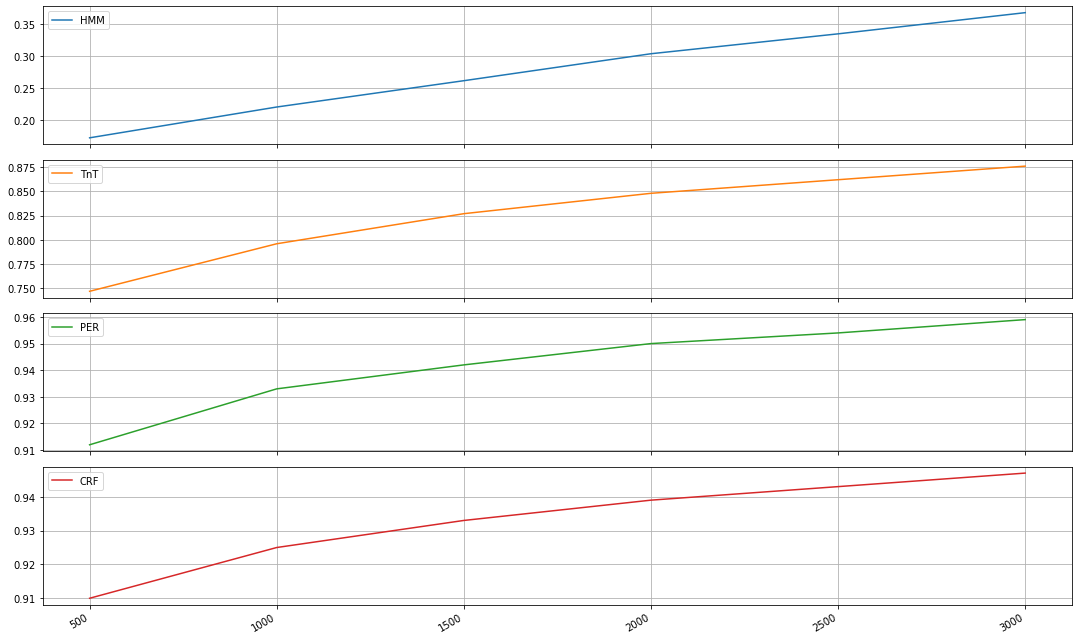

In [7]:
accDf = pd.DataFrame(testAcc)
print(accDf)
accDf.to_csv("./test_accuracies.csv")
accDf.plot(subplots=True, figsize=(15, 9), grid='on')
plt.tight_layout()
plt.show()


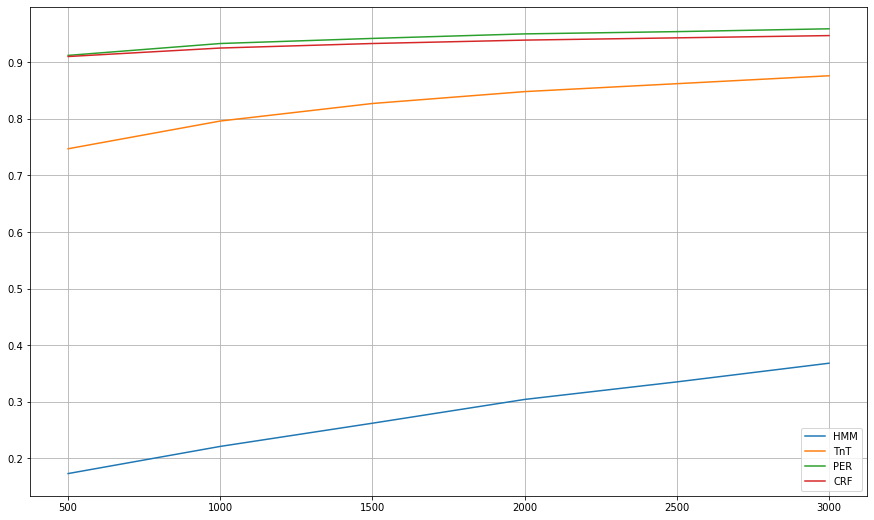

In [9]:
accDf.plot(subplots=False, figsize=(15, 9), grid='on')
plt.show()

***

## Conclusion

- Which model would you select? Justify the answer.

If the objective is to get the best possible accuracy regardless of the runtime of the algorithm selected, I would select the Perceptron, as it is the best at selecting with a runtime of 1.4s and an accuracy of 95.9% in the model trained with 3000 sentences.

If the objective is to get a good balance of performance and time efficiency, I would select the CRF model with an accuracy of 94.7% and a runtime of 0.88s.

***

### End of P4